Gather the mean values of T2 from every BA in the Historical dataset and create a time series analysis

In [76]:
import os

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import glob

from pathlib import Path

In [2]:
def t2_mean(path):
    
    # input the directory to the set of files as a raw string e.g. r'C:\projects\CONUS_TGW_WRF_SSP585_HOT\CONUS_TGW_WRF_SSP585_HOT'
    files_path = path
    list_of_files = glob.glob(os.path.join(files_path , "*.csv"))
    
    # create a list of the mean of T2 of each file
    means_list = []
    for file_name in list_of_files:
        df = pd.read_csv(file_name, index_col = None, header = 0)
        means_list.append(df['T2'].mean())
    
    means_df = pd.DataFrame(means_list, columns = ["T2_Mean"])
    
    # create list of file names to get more information for each T2
    files = []
    for file_path in list_of_files:
        name = os.path.basename(file_path)
        files.append(name)
     
    # split the file names into lists in BA_list
    BA_list_split = []
    for csv_name in range(len(files)):
        base_name = os.path.splitext(os.path.basename(files[csv_name]))[0]
        split = base_name.split("_")
        BA_list_split.append(split)
        
    # take the first elements (BAs) and last elements (years) and put them into their respective lists
    BA_names = []
    years = []
    for file_list in BA_list_split:
        BA_names.append(file_list[0])
        years.append(file_list[5])
        
    # add BA and Year columns to dataframe and correct the column order
    means_df['BA'] = BA_names
    means_df['Year'] = years

    means_df = means_df[['BA', 'Year', 'T2_Mean']]
    
    return means_df

In [3]:
# create a df for both the cold and hot datasets using t2_mean function
hot_df = t2_mean(r'C:\projects\CONUS_TGW_WRF_SSP585_HOT\CONUS_TGW_WRF_SSP585_HOT')
cold_df = t2_mean(r'C:\projects\CONUS_TGW_WRF_SSP585_COLD\CONUS_TGW_WRF_SSP585_COLD')

In [82]:
cold_AEC = cold_df.loc[(cold_df['BA'] == 'AEC')]
hot_AEC = hot_df.loc[(hot_df['BA'] == 'AEC')]

temp_diff_df = hot_AEC['T2_Mean'] - cold_AEC['T2_Mean']

temp_diff_li = list(temp_diff_df)

type(temp_diff_li[0])

temps_rounded = []
for temp in temp_diff_li:
    temp_round = round(temp, 2)
    temps_rounded.append(temp_round)

print(temps_rounded)

[0.27, 0.41, 0.44, 0.51, 0.54, 0.48, 0.51, 0.54, 0.56, 0.6, 0.56, 0.58, 0.47, 0.42, 0.38, 0.31, 0.45, 0.46, 0.48, 0.59, 0.53, 0.57, 0.6, 0.58, 0.63, 0.66, 0.72, 0.72, 0.56, 0.57, 0.66, 0.83, 0.68, 0.78, 0.68, 0.84, 0.79, 0.82, 0.97, 0.9, 1.16, 1.45, 1.43, 1.27, 1.31, 1.39, 1.27, 1.28, 1.29, 1.42, 1.35, 1.35, 1.41, 1.28, 1.31, 1.34, 1.44, 1.57, 1.52, 1.61, 1.43, 1.72, 1.54, 1.77, 1.84, 1.64, 1.65, 1.56, 1.61, 1.59, 1.81, 1.74, 1.68, 1.76, 1.7, 1.91, 1.76, 1.76, 1.96, 1.76]


([<matplotlib.axis.XTick at 0x221cfbe2bc0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

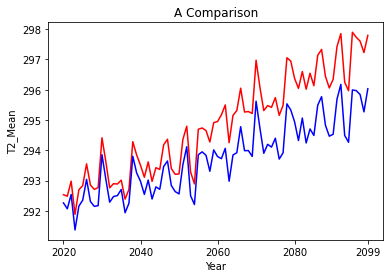

In [10]:
# compare the two AEC T2 means over time with a line graph
plt.plot(hot_AEC['Year'], hot_AEC['T2_Mean'], color = "red")
plt.plot(cold_AEC['Year'], cold_AEC['T2_Mean'], color = "blue")

plt.xlabel('Year')
plt.title('A Comparison')
plt.ylabel('T2_Mean')

plt.xticks([0, 20, 40, 60, 79])

I want a function that takes a BA as an input, and outputs the hot/cold T2_Mean for that BA.

In [87]:
def t2_visual(input_BA): # insert a BA as a string e.g. 'AEC'
    
    # need to take the BA string input, and create subsets of hot_df and cold_df from them
    cold_BA = cold_df.loc[(cold_df['BA'] == input_BA)]
    hot_BA = hot_df.loc[(hot_df['BA'] == input_BA)]
    
    # create and show the visualization
    plt.plot(hot_BA['Year'], hot_BA['T2_Mean'], color = "red")
    plt.plot(cold_BA['Year'], cold_BA['T2_Mean'], color = "blue")

    plt.xlabel('Year')
    plt.title('A Comparison of ' + input_BA + ' Scenarios')
    plt.ylabel('T2_Mean (K)')

    plt.xticks([0, 20, 40, 60, 79])
    
    plt.show()
    
    # express the temperature differences at initial and final points
    temp_diff_df = hot_BA['T2_Mean'] - cold_BA['T2_Mean']
    
    temp_diff_li = list(temp_diff_df)

    # use for loop to print where difference becomes "significant" e.g. 1 dg
    initial_temp_diff = temp_diff_df.iloc[0].round(2)
    final_temp_diff = temp_diff_df.iloc[-1].round(2)
    
    print('2020 temperature difference: ' + str(initial_temp_diff))
    print('2099 temperature difference: ' + str(final_temp_diff))
    
    # add plot legend plt.legend()
    
    # add units (kelvin) maybe convert to F
    
    return

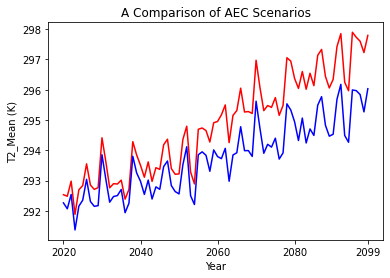

2020 temperature difference: 0.27
2099 temperature difference: 1.76


In [88]:
t2_visual('AEC')

New function to loop through the BAs and find first year where difference is greater than 1dg (or use as another input variable in function). Plot this. Use unique values in hot_df and cold_df to get list of BAs. calculate pdf (using python package) of temp for a given decade/5yr span (using a loop to separate data by decade), see if approximates to normal.